# Importing and Reading Dataset of Amazon.com, Inc. 

In [3]:
import pandas as pd

df = pd.read_csv('AMZN.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6635,2023-09-27,125.760002,127.480003,124.129997,125.980003,125.980003,66553400
6636,2023-09-28,124.040001,126.580002,123.040001,125.980003,125.980003,54555000
6637,2023-09-29,128.199997,129.149994,126.320000,127.120003,127.120003,62377600
6638,2023-10-02,127.279999,130.470001,126.540001,129.460007,129.460007,48029700


## We will now look at the closing price of each stock

In [4]:
df = df[['Date', 'Close']]

df


,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6635,2023-09-27,125.980003
6636,2023-09-28,125.980003
6637,2023-09-29,127.120003
6638,2023-10-02,129.460007


In [5]:
df['Date']

0       1997-05-15
1       1997-05-16
2       1997-05-19
3       1997-05-20
4       1997-05-21
           ...    
6635    2023-09-27
6636    2023-09-28
6637    2023-09-29
6638    2023-10-02
6639    2023-10-03
Name: Date, Length: 6640, dtype: object

#### Converting String to Integer

In [6]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\dell\AppData\Local\Temp\ipykernel_4388\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1997-05-15
1      1997-05-16
2      1997-05-19
3      1997-05-20
4      1997-05-21
          ...    
6635   2023-09-27
6636   2023-09-28
6637   2023-09-29
6638   2023-10-02
6639   2023-10-03
Name: Date, Length: 6640, dtype: datetime64[ns]

#### Making date column index

In [8]:
df.index = df.pop('Date')
df

,Close
Date,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354
...,...
2023-09-27,125.980003
2023-09-28,125.980003
2023-09-29,127.120003


## Plotting the prices using Matplotlib

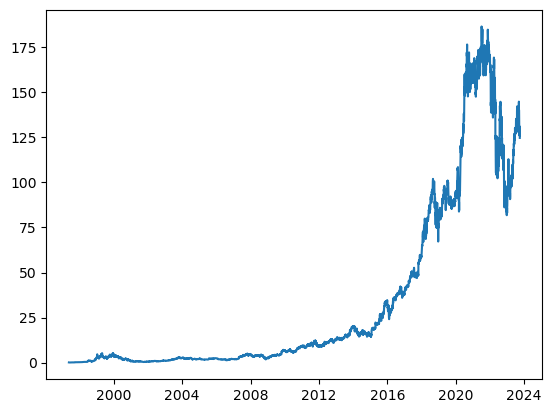

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

## Converting into Supervised Data

In [10]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,155.543503,156.875000,154.353500,152.313004
1,2021-03-26,156.875000,154.353500,152.313004,152.601501
2,2021-03-29,154.353500,152.313004,152.601501,153.786499
3,2021-03-30,152.313004,152.601501,153.786499,152.764496
4,2021-03-31,152.601501,153.786499,152.764496,154.703995
...,...,...,...,...,...
247,2022-03-17,141.852997,147.366501,153.104004,157.238998
248,2022-03-18,147.366501,153.104004,157.238998,161.250504
249,2022-03-21,153.104004,157.238998,161.250504,161.491501
250,2022-03-22,157.238998,161.250504,161.491501,164.889008


### Converting Data frame into numpy array

In [11]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

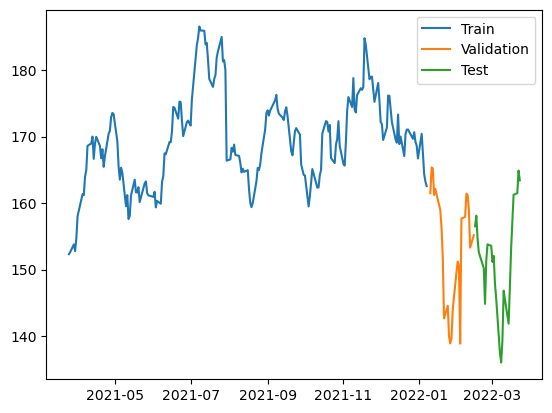

In [12]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

# Creating and Training the model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Epoch 1/100
7/7 [==============================] - 4s 131ms/step - loss: 28648.0332 - mean_absolute_error: 169.1149 - val_loss: 23311.9648 - val_mean_absolute_error: 152.4431
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 28467.4824 - mean_absolute_error: 168.5799 - val_loss: 23146.3906 - val_mean_absolute_error: 151.8989
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 28265.2441 - mean_absolute_error: 167.9784 - val_loss: 22917.6699 - val_mean_absolute_error: 151.1442
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 27969.5488 - mean_absolute_error: 167.0971 - val_loss: 22580.7266 - val_mean_absolute_error: 150.0254
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 27547.8789 - mean_absolute_error: 165.8292 - val_loss: 22141.6895 - val_mean_absolute_error: 148.5551
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 27030.8164 - mean_absolute_error: 164.2626 - val_loss: 2163

7/7 [==============================] - 0s 8ms/step - loss: 47.2187 - mean_absolute_error: 5.4540 - val_loss: 296.5125 - val_mean_absolute_error: 15.0640
Epoch 50/100
7/7 [==============================] - 0s 9ms/step - loss: 47.1112 - mean_absolute_error: 5.4207 - val_loss: 315.7802 - val_mean_absolute_error: 15.6907
Epoch 51/100
7/7 [==============================] - 0s 11ms/step - loss: 46.2286 - mean_absolute_error: 5.3823 - val_loss: 303.5734 - val_mean_absolute_error: 15.2997
Epoch 52/100
7/7 [==============================] - 0s 11ms/step - loss: 47.2603 - mean_absolute_error: 5.4570 - val_loss: 305.9754 - val_mean_absolute_error: 15.3786
Epoch 53/100
7/7 [==============================] - 0s 12ms/step - loss: 46.2635 - mean_absolute_error: 5.4019 - val_loss: 353.4919 - val_mean_absolute_error: 16.8465
Epoch 54/100
7/7 [==============================] - 0s 12ms/step - loss: 47.0349 - mean_absolute_error: 5.4716 - val_loss: 331.2196 - val_mean_absolute_error: 16.1872
Epoch 55/100


7/7 [==============================] - 0s 11ms/step - loss: 23.6689 - mean_absolute_error: 3.8872 - val_loss: 131.1044 - val_mean_absolute_error: 9.7511
Epoch 99/100
7/7 [==============================] - 0s 14ms/step - loss: 22.0678 - mean_absolute_error: 3.7202 - val_loss: 152.3367 - val_mean_absolute_error: 10.8078
Epoch 100/100
7/7 [==============================] - 0s 16ms/step - loss: 23.5318 - mean_absolute_error: 3.8828 - val_loss: 109.2041 - val_mean_absolute_error: 8.6966


7/7 [==============================] - 1s 4ms/step


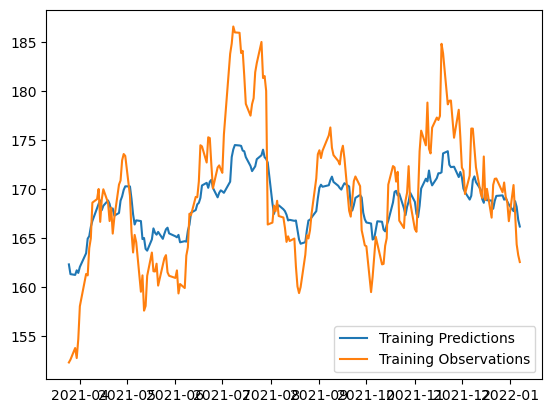

In [18]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

# Validating the model

1/1 [==============================] - 0s 30ms/step


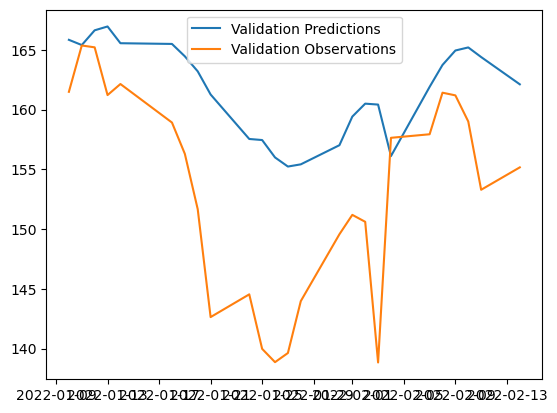

In [19]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

# Testing the model

1/1 [==============================] - 0s 30ms/step


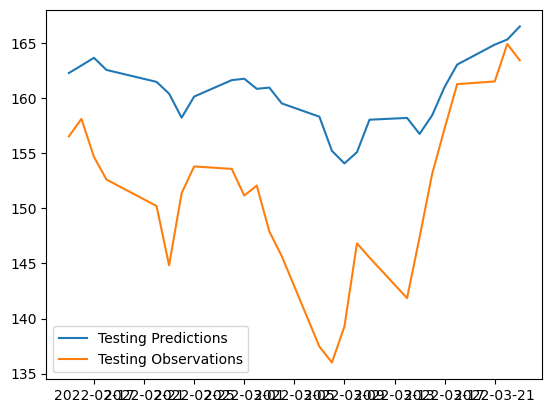

In [20]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

# Merging all the processes

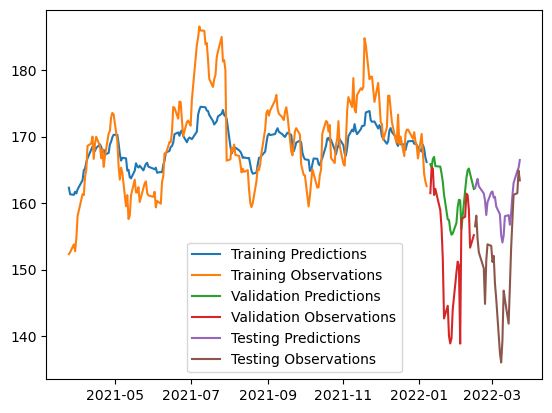

In [21]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

# For recursive dates

In [22]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 20ms/step


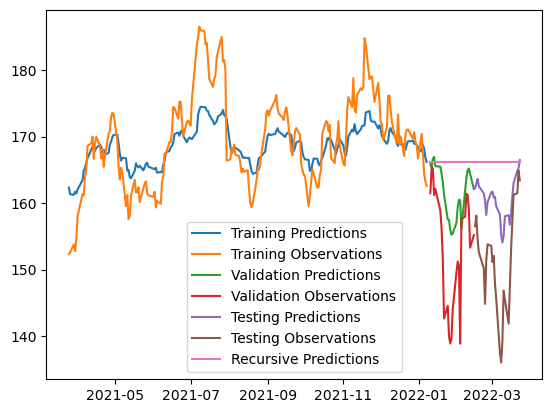

In [23]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])